# Тестовый стенд

# Данные

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("timestamps1.txt") as file:
    t = [int(x) for x in file]
print(t)

[3387, 3406, 3404, 3405, 3403, 3399, 3408, 3394, 3393, 3397, 3384, 3404, 3397, 3394, 3388, 3384, 3405, 3393, 3395, 3391, 3398, 3408, 3412, 3391, 3390, 3386, 3385, 3409, 3412, 3376, 3383, 3398, 3382, 3396, 3390, 3377, 3385, 3388, 3379]


(array([3., 2., 5., 5., 4., 6., 3., 3., 5., 3.]),
 array([3376. , 3379.6, 3383.2, 3386.8, 3390.4, 3394. , 3397.6, 3401.2,
        3404.8, 3408.4, 3412. ]),
 <BarContainer object of 10 artists>)

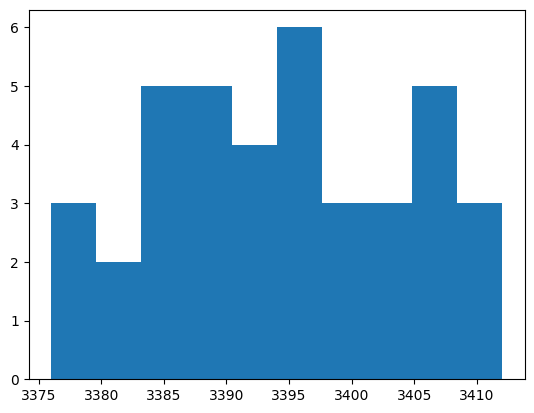

In [3]:
plt.hist(t)

# Тесты на нормальность

In [4]:
normaltest = stats.normaltest(t)
shapirotest = stats.shapiro(t)
print(f'p-value теста на нормальное распределение: {normaltest.pvalue}')
print(f'p-value теста Шапиро-Уилка: {shapirotest.pvalue}')
if normaltest.pvalue > 0.05 or shapirotest.pvalue > 0.05:
    print("Тест на нормальность пройден (p-value > 0.05 хотя бы на одном тесте)")
else: 
    print("Тест на нормальность не пройден (p-value < 0.05)")

p-value теста на нормальное распределение: 0.23512427772851754
p-value теста Шапиро-Уилка: 0.39404624700546265
Тест на нормальность пройден (p-value > 0.05 хотя бы на одном тесте)


# Среднее и стандартное отклонение

In [5]:
mean = np.mean(t)
print(f'Среднее - {mean}')

Среднее - 3394.25641025641


In [6]:
std = np.std(t, ddof=1)
print(f'Стандартное отклонение - {std}')

Стандартное отклонение - 9.88278127462089


In [7]:
print(f'Стандартное отклонение составляет {std/mean * 100} процентов от среднего')

Стандартное отклонение составляет 0.29116189468651016 процентов от среднего


# Доверительный интервал

In [8]:
conf = stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)
print(f'Неокругленный разброс: {conf}')

Неокругленный разброс: 3.203627086389121


In [9]:
roundedConf = round(conf)
print(f'Округленный разброс доверительного интервала: {roundedConf}')
roundedMeanConf = round(mean)
print(f'Округленное среднее: {roundedMeanConf}')
print(f'95% Доверительный интервал: {roundedMeanConf} ± {roundedConf}')

Округленный разброс доверительного интервала: 3
Округленное среднее: 3394
95% Доверительный интервал: 3394 ± 3


# Предсказывающий интервал

In [10]:
pred = std * 2
print(f'Неокругленный разброс: {pred}')

Неокругленный разброс: 19.76556254924178


In [11]:
roundedPred = round(pred)
print(f'Округленный разброс доверительного интервала: {roundedPred}')
roundedMeanPred = round(mean)
print(f'Округленное среднее: {roundedMeanPred}')
print(f'95% Доверительный интервал: {roundedMeanPred} ± {roundedPred}')

Округленный разброс доверительного интервала: 20
Округленное среднее: 3394
95% Доверительный интервал: 3394 ± 20
